In [ ]:
import pandas as pd
import numpy as np
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

link = 'https://drive.google.com/open?id=1c3QoGr_PuZ7YHWyslYYGYzpOMGRbNSPY'
fluff, id = link.split('=')
print (id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('HR-Employee-Attrition.csv')  
employee = pd.read_csv('HR-Employee-Attrition.csv')
employee.head(10)

1c3QoGr_PuZ7YHWyslYYGYzpOMGRbNSPY


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Explorative Data Analysis



### Data Preprocessing and Summary Statistics

In [ ]:
# check missing values
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# sample size
len(employee)

1470

In [ ]:
employee.shape ## Get the shape of the dataframe

(1470, 35)

In [ ]:
# summary statistics of continious variables
employee_sum = employee.agg(
    {
        "Age": ["min", "max", "mean","median", "std"],
        "DailyRate": ["min", "max", "mean","median", "std"],
        "NumCompaniesWorked": ["min", "max", "mean","median", "std"],
        "YearsAtCompany" : ["min", "max", "mean","median", "std"],
        "PercentSalaryHike" : ["min", "max", "mean","median", "std"],
        "YearsSinceLastPromotion" : ["min", "max", "mean","median", "std"],
        "YearsWithCurrManager" :["min", "max", "mean","median", "std"],
        "MonthlyIncome" : ["min", "max", "mean","median", "std"],
        "DistanceFromHome" : ["min", "max", "mean","median", "std"]
    }
)
employee_sum.to_csv("employee_sum.csv")
from google.colab import files
files.download('employee_sum.csv')
employee_sum

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Age,DailyRate,NumCompaniesWorked,YearsAtCompany,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome,DistanceFromHome
min,18.000000,102.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1009.000000,1.000000
max,60.000000,1499.000000,9.000000,40.000000,25.000000,15.000000,17.000000,19999.000000,29.000000
mean,36.923810,802.485714,2.693197,7.008163,15.209524,2.187755,4.123129,6502.931293,9.192517
median,36.000000,802.000000,2.000000,5.000000,14.000000,1.000000,3.000000,4919.000000,7.000000
std,9.135373,403.509100,2.498009,6.126525,3.659938,3.222430,3.568136,4707.956783,8.106864


In [ ]:
# summary statistics of categorical variables
category_cols=employee.select_dtypes(include=object).columns.tolist()
category_df=pd.DataFrame(employee[category_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
print("Summary Statistics of categorical variables")
display(category_df.T)
category_df.to_csv('category_sum.csv')

Summary Statistics of categorical variables


column Attrition       BusinessTravel  ... Over18 OverTime      
value        Yes    No     Non-Travel  ...      Y      Yes    No
count        237  1233            150  ...   1470      416  1054

[1 rows x 31 columns]

In [ ]:
print(employee.Attrition.value_counts())
print(employee.BusinessTravel.value_counts(normalize=True))
print(employee.Department.value_counts().sort_index(ascending=True).sort_values(ascending=True) )

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
Human Resources            63
Sales                     446
Research & Development    961
Name: Department, dtype: int64


In [ ]:
print(employee.Education.value_counts(normalize=True))
print(employee.JobSatisfaction.value_counts(normalize=True)	)
print(employee.JobLevel.value_counts(normalize=True))
print(employee.JobInvolvement.value_counts())
## Pie chart
print(employee.Gender.value_counts(normalize=True))

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64
1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
Male      0.6
Female    0.4
Name: Gender, dtype: float64


In [ ]:
print(employee.JobRole.value_counts().sort_index(ascending=True).sort_values(ascending=True).to_frame())

                           JobRole
Human Resources                 52
Research Director               80
Sales Representative            83
Manager                        102
Healthcare Representative      131
Manufacturing Director         145
Laboratory Technician          259
Research Scientist             292
Sales Executive                326


In [ ]:
print(employee.WorkLifeBalance.value_counts(normalize=True))
print(employee.RelationshipSatisfaction.value_counts(normalize=True))
print(employee.MaritalStatus.value_counts().sort_values(ascending=True))
print(employee.PerformanceRating.value_counts().sort_values(ascending=True))
print(employee.RelationshipSatisfaction.value_counts().sort_values(ascending=True))
print(employee.EducationField.value_counts().sort_index(ascending=True).sort_values(ascending=True).to_frame())

3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: WorkLifeBalance, dtype: float64
3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: RelationshipSatisfaction, dtype: float64
Divorced    327
Single      470
Married     673
Name: MaritalStatus, dtype: int64
4     226
3    1244
Name: PerformanceRating, dtype: int64
1    276
2    303
4    432
3    459
Name: RelationshipSatisfaction, dtype: int64
                  EducationField
Human Resources               27
Other                         82
Technical Degree             132
Marketing                    159
Medical                      464
Life Sciences                606


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc602982fd0>],
      dtype=object)

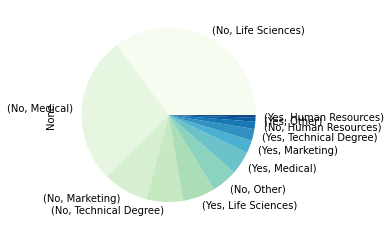

In [ ]:
target_columns = ["Attrition","EducationField"]
subset = employee.loc[:, target_columns]
subset.value_counts().plot(kind="pie",subplots=True,colormap = "GnBu")
## Try, same chart as using groupby()

# Sub-task 1: Who are IBM employees?

In [ ]:
# function to plot distribution
def distribution_plot(var, color_start, color_end):
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  colors = sns.color_palette('GnBu')[color_start:color_end]
  employee[var].value_counts().plot(kind="pie", colors=colors, autopct='%1.1f%%')
  plt.subplot(1,2,2)
  sns.countplot(employee[var], palette=colors)
  return employee[var].value_counts()

## gender distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Male      882
Female    588
Name: Gender, dtype: int64

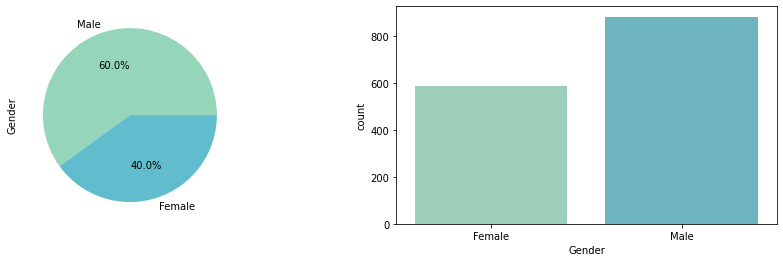

In [ ]:
distribution_plot('Gender', 2, 4)

## education distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Graduate         572
Post Graduate    398
Undergrad        282
High School      170
Doctorate         48
Name: Education, dtype: int64

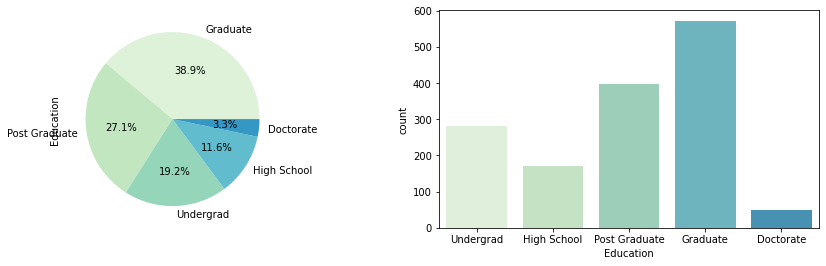

In [ ]:
employee.Education.replace({1: 'High School',
                       2:'Undergrad',
                       3:'Graduate',
                       4:'Post Graduate',
                       5:'Doctorate'},inplace=True)
distribution_plot('Education', 0, 5)

## marital status distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

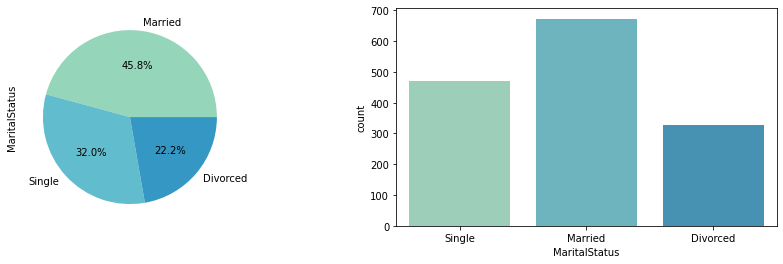

In [ ]:
distribution_plot('MaritalStatus', 2, 5)

## department distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

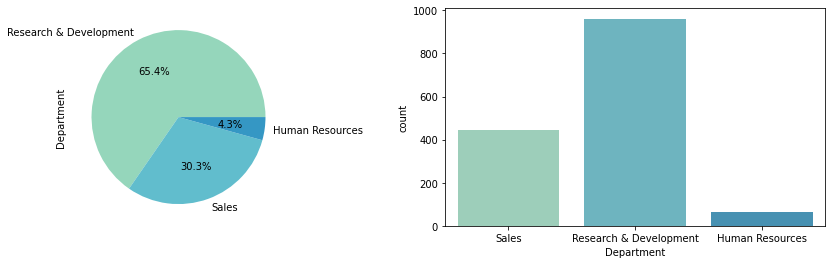

In [ ]:
distribution_plot('Department', 2, 5)

## Attrition Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



No     1233
Yes     237
Name: Attrition, dtype: int64

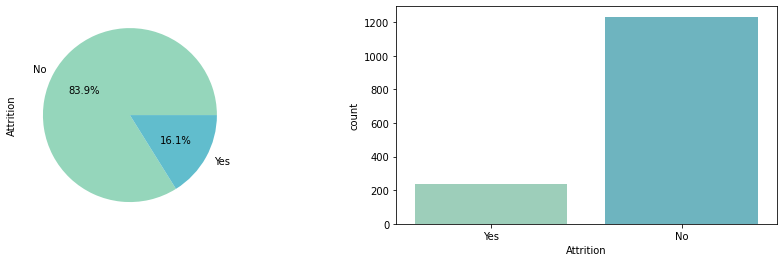

In [ ]:
distribution_plot('Attrition', 2, 4)

# Sub-task 2: What job roles do they play?


## Job Roles: How many employees in each Job Role?

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<Figure size 1008x288 with 0 Axes>

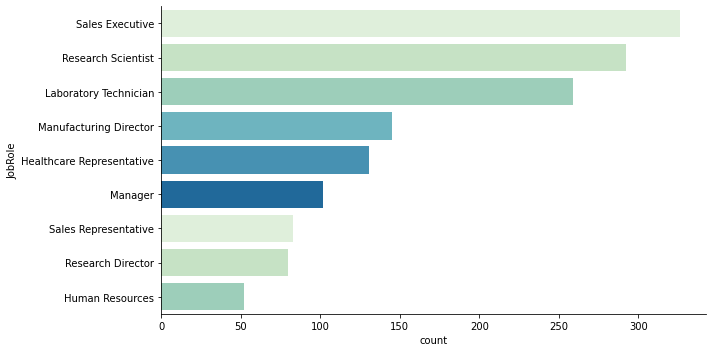

In [ ]:
plt.figure(figsize=(14,4))
sns.catplot(y='JobRole', kind='count', aspect=2, data=employee, palette=sns.color_palette('GnBu'))
employee['JobRole'].value_counts()

## Salary by Job Role: What's the average salary by job role?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

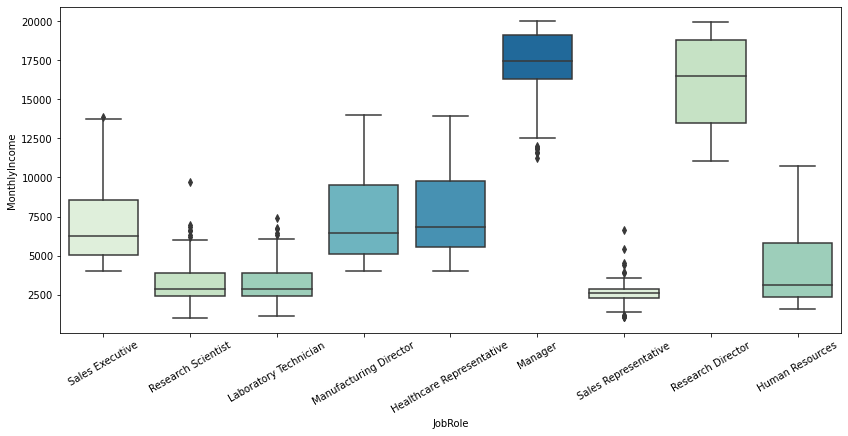

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=employee, x='JobRole', y='MonthlyIncome', palette=sns.color_palette('GnBu'))
plt.xticks(rotation = 30)

## Gender by Job Role: What's the gender distribution by job role?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

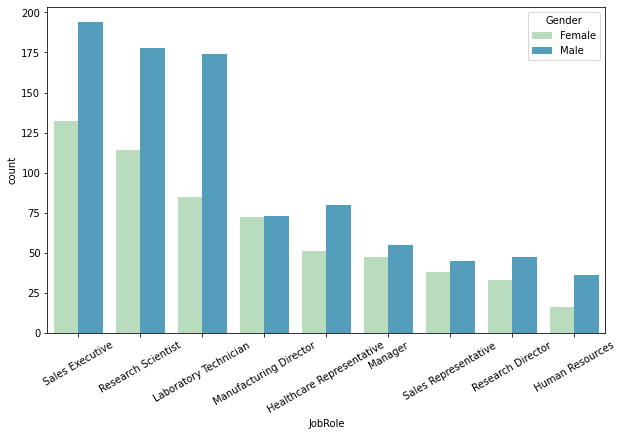

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = employee,
            x='JobRole',
            hue='Gender',
            palette = 'GnBu')
plt.xticks(rotation = 30)

# Sub-task 3: How involved are they in work?


## What is the job involvement distribution?

High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64

<Figure size 864x144 with 0 Axes>

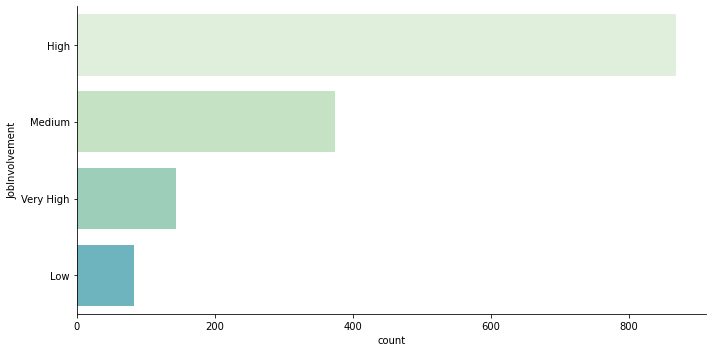

In [ ]:
employee.JobInvolvement.replace({1: 'Low',
                       2:'Medium',
                       3:'High',
                       4:'Very High'},inplace=True)
plt.figure(figsize=(12,2))
sns.catplot(y='JobInvolvement', kind='count', aspect=2, data=employee, palette=sns.color_palette('GnBu'))
employee['JobInvolvement'].value_counts()

## What is the median salary by job involvement

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

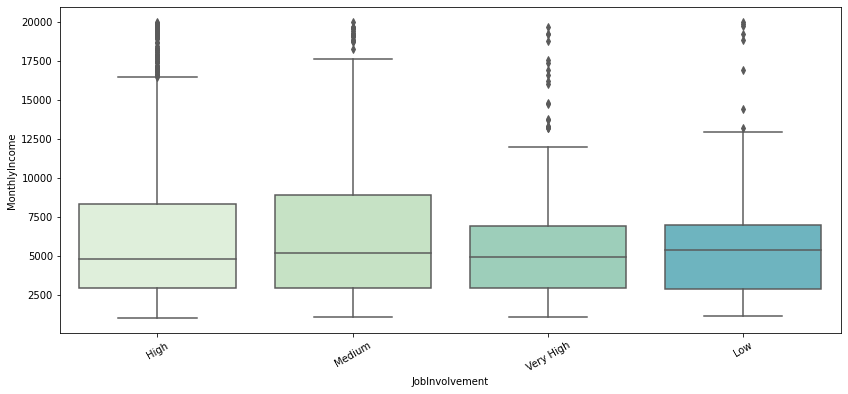

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=employee, x='JobInvolvement', y='MonthlyIncome', palette=sns.color_palette('GnBu'))
plt.xticks(rotation = 30)

# Sub-task 4: Who resigned?

In [ ]:
employee.groupby('Attrition').mean().T

Attrition,No,Yes
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EmployeeCount,1.000000,1.000000
EmployeeNumber,1027.656123,1010.345992
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987
JobLevel,2.145985,1.637131


## Attrtion VS Employed

In [ ]:
# slicing the dataframe by attrition 
stayed = employee.loc[employee.Attrition=='No']
left = employee.loc[employee.Attrition=='Yes']

In [ ]:
def attrition_lineplot(continuous_var):
  plt.figure(figsize=(10,5))
  sns.kdeplot(left[continuous_var],label='Left Company',color='tomato')
  sns.kdeplot(stayed[continuous_var],label='Still Employed',color='royalblue')
  plt.legend()

In [ ]:
def attrition_histplot(categorical_var):
  plt.figure(figsize=(10,5))
  sns.countplot(x=employee[categorical_var],hue=employee['Attrition'], palette='GnBu')
  plt.legend()

### Age

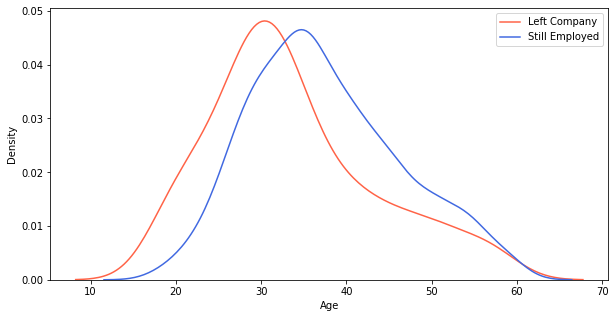

In [ ]:
attrition_lineplot('Age')

### Monthly Income

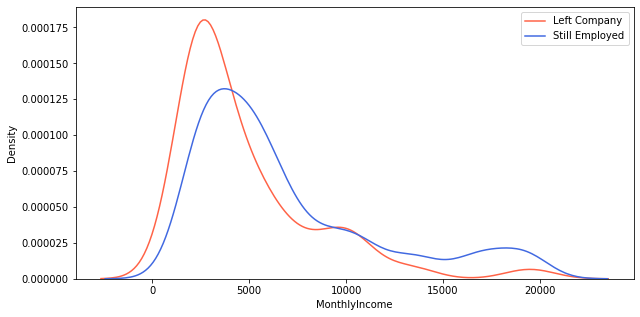

In [ ]:
attrition_lineplot('MonthlyIncome')

### Distance

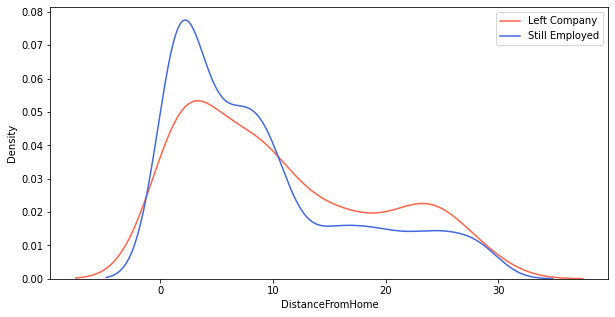

In [ ]:
attrition_lineplot('DistanceFromHome')

### Number of Companies Worked

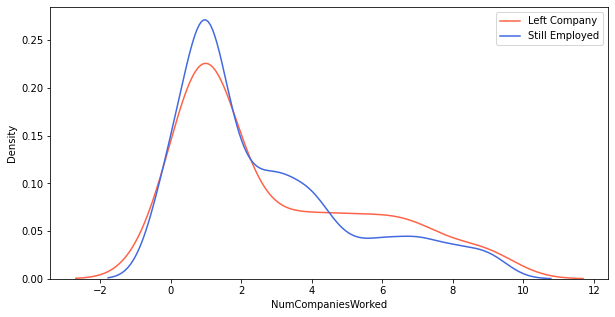

In [ ]:
attrition_lineplot('NumCompaniesWorked')

### Years With Current Manager

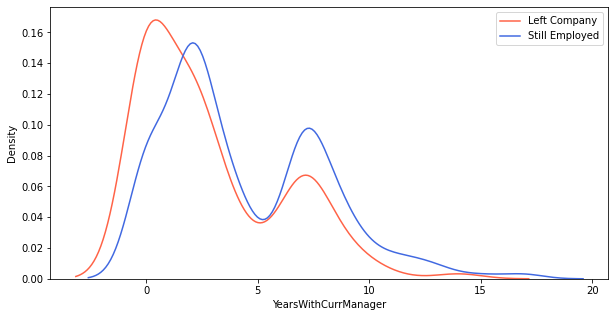

In [ ]:
attrition_lineplot('YearsWithCurrManager')

### Job Involvement

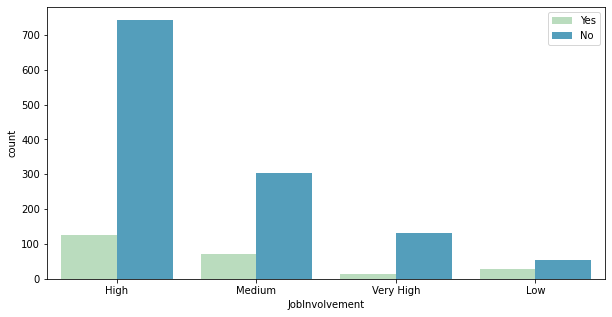

In [ ]:
employee.JobInvolvement.replace({1: 'Low',
                       2:'Medium',
                       3:'High',
                       4:'Very High'},inplace=True)
attrition_histplot('JobInvolvement')

### Overtime

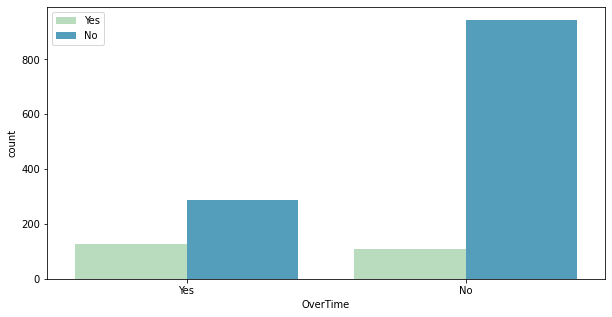

In [ ]:
attrition_histplot('OverTime')

## Attrition Rate by Gender & Deparment

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
attrition_cate = employee.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
print(attrition_cate)
attrition_cate = attrition_cate .mul(100).rename('Percent').reset_index()
fig = px.bar(attrition_cate, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.80, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
             template='plotly_white',color_discrete_map={'Yes': '#758a99','No': '#66CDAA'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='black'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#f9f9f1')
fig.show()

Gender  Department              Attrition
Female  Human Resources         No           0.700000
                                Yes          0.300000
        Research & Development  No           0.886544
                                Yes          0.113456
        Sales                   No           0.798942
                                Yes          0.201058
Male    Human Resources         No           0.860465
                                Yes          0.139535
        Research & Development  No           0.845361
                                Yes          0.154639
        Sales                   No           0.789883
                                Yes          0.210117
Name: Attrition, dtype: float64


## Attrition Rate by Gender & Job involvement

In [ ]:
Gender_Depart_Disparity = employee.groupby(['Gender','Department'])['JobInvolvement'].value_counts(normalize=True).sort_values(ascending=True)
print(Gender_Depart_Disparity)

Gender  Department              JobInvolvement
Male    Human Resources         Low               0.046512
Female  Research & Development  Low               0.047493
        Human Resources         Low               0.050000
Male    Research & Development  Low               0.056701
Female  Sales                   Low               0.063492
Male    Sales                   Low               0.066148
Female  Sales                   Very High         0.068783
Male    Sales                   Very High         0.085603
        Human Resources         Very High         0.093023
Female  Research & Development  Very High         0.097625
Male    Research & Development  Very High         0.111684
Female  Human Resources         Very High         0.150000
Male    Sales                   Medium            0.241245
        Research & Development  Medium            0.243986
Female  Human Resources         Medium            0.250000
        Sales                   Medium            0.253968
Male    H

In [ ]:
employee.JobInvolvement.replace({1: 'Low',
                       2:'Medium',
                       3:'High',
                       4:'Very High'},inplace=True)
attrition_cate_job = employee.groupby(['Gender','JobInvolvement'])['Attrition'].value_counts(normalize=True)
print(attrition_cate_job)
attrition_cate = attrition_cate_job .mul(100).rename('Percent').reset_index()
fig = px.bar(attrition_cate, x="JobInvolvement", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.80, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
             template='plotly_white',color_discrete_map={'Yes': '#758a99','No': '#48c0a3'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='black'),  width=.4)
fig.update_layout(title_text='Attrition Rates by JobInvolvement and Gender', yaxis_ticksuffix = '%')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#f9f9f1')
fig.show()

Gender  JobInvolvement  Attrition
Female  High            No           0.866667
                        Yes          0.133333
        Low             No           0.612903
                        Yes          0.387097
        Medium          No           0.855346
                        Yes          0.144654
        Very High       No           0.886792
                        Yes          0.113208
Male    High            No           0.848948
                        Yes          0.151052
        Low             No           0.692308
                        Yes          0.307692
        Medium          No           0.777778
                        Yes          0.222222
        Very High       No           0.923077
                        Yes          0.076923
Name: Attrition, dtype: float64


In [ ]:
Gender_Depart_Disparity_1 = employee.groupby(['Gender','JobRole'])['MonthlyIncome'].mean()
print(Gender_Depart_Disparity_1)
Gender_Depart_Disparity_2 = employee.groupby(['Gender','Department'])['MonthlyIncome'].mean()
print(Gender_Depart_Disparity_2)

Gender  JobRole                  
Female  Healthcare Representative     7433.803922
        Human Resources               4540.687500
        Laboratory Technician         3246.905882
        Manager                      16915.276596
        Manufacturing Director        7409.166667
        Research Director            15144.484848
        Research Scientist            3344.473684
        Sales Executive               6764.310606
        Sales Representative          2671.947368
Male    Healthcare Representative     7589.300000
        Human Resources               4100.222222
        Laboratory Technician         3232.413793
        Manager                      17409.327273
        Manufacturing Director        7182.671233
        Research Director            16657.787234
        Research Scientist            3173.044944
        Sales Executive               7033.123711
        Sales Representative          2587.200000
Name: MonthlyIncome, dtype: float64
Gender  Department            

## OverTime Rates by Department & Gender

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
Overtime = employee.groupby(['Gender','Department'])['OverTime'].value_counts(normalize=True)
print(Overtime)
Overtime = Overtime .mul(100).rename('Percent').reset_index()
fig = px.bar(Overtime, x="Department", y="Percent", color="OverTime", barmode="group",
            text='Percent', opacity=.80, facet_col="Gender", category_orders={'OverTime': ['Yes', 'No']},
             template='plotly_white',color_discrete_map={'Yes': '#758a99','No': '#48c0a3'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='black'),  width=.4)
fig.update_layout(title_text='OverTime Rates by Department and Gender', yaxis_ticksuffix = '%')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#f9f9f1')
fig.show()

Gender  Department              OverTime
Female  Human Resources         No          0.700000
                                Yes         0.300000
        Research & Development  No          0.704485
                                Yes         0.295515
        Sales                   No          0.671958
                                Yes         0.328042
Male    Human Resources         No          0.744186
                                Yes         0.255814
        Research & Development  No          0.726804
                                Yes         0.273196
        Sales                   No          0.743191
                                Yes         0.256809
Name: OverTime, dtype: float64


## Attrition Rates by OverTime & Marital Status

In [ ]:
Attrition_1 = employee.groupby(['MaritalStatus','OverTime'])['Attrition'].value_counts(normalize=True)
print(Attrition_1)
Attrition_1 = Attrition_1 .mul(100).rename('Percent').reset_index()
fig = px.bar(Attrition_1, x="MaritalStatus", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.80, facet_col="OverTime", category_orders={'Attrition': ['Yes', 'No']},
             template='plotly_white',color_discrete_map={'Yes': '#758a99','No': '#48c0a3'}) 
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='black'),  width=.4)
fig.update_layout(title_text='Attrition Rates by OverTime and Marital Status', yaxis_ticksuffix = '%')
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#f9f9f1')
fig.show()

MaritalStatus  OverTime  Attrition
Divorced       No        No           0.938596
                         Yes          0.061404
               Yes       No           0.808081
                         Yes          0.191919
Married        No        No           0.915811
                         Yes          0.084189
               Yes       No           0.768817
                         Yes          0.231183
Single         No        No           0.837758
                         Yes          0.162242
               Yes       No           0.503817
                         Yes          0.496183
Name: Attrition, dtype: float64


# Sub-task 5: Correlation Analysis

In [ ]:
import seaborn as sns
employee_continuous = employee.loc[:, ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
corr_employee = employee_continuous.corr()
corr_employee

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.680381,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.007707,-0.032182,0.038153,0.022704,0.014515,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.004628,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.015794,-0.015297,0.022157,-0.009062,-0.002334,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.772893,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.034814,1.000000,0.017521,-0.006429,0.026442,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.237639,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,-0.020608,-0.035991,-0.001520,-0.022154,-0.011985
TotalWorkingYears,0.680381,0.014515,0.004628,-0.002334,0.772893,0.026442,0.237639,-0.020608,1.000000,0.628133,0.460365,0.404858,0.459188
YearsAtCompany,0.311309,-0.034055,0.009508,-0.019582,0.514285,-0.023655,-0.118421,-0.035991,0.628133,1.000000,0.758754,0.618409,0.769212


Text(0.5, 1.0, 'Correlation Heatmap of continuous variables')

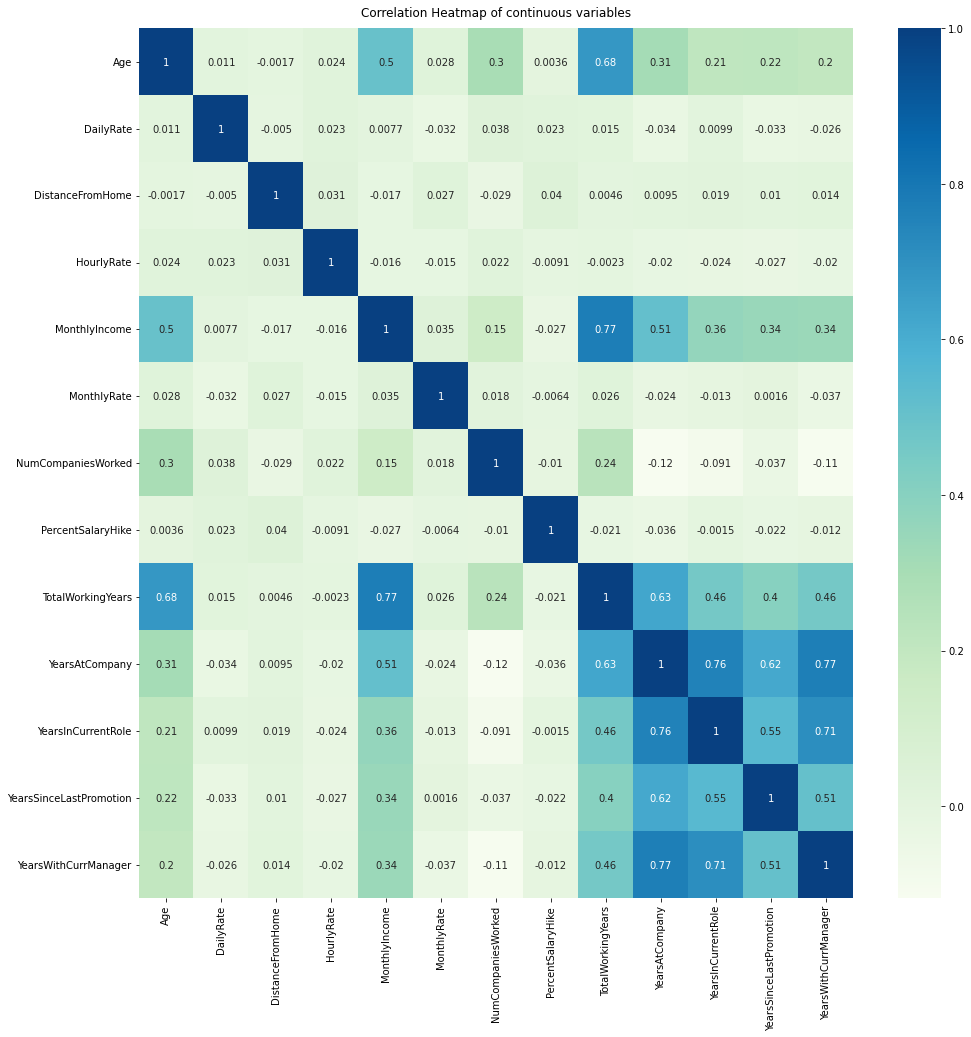

In [ ]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(corr_employee, annot=True,cmap='GnBu')
heatmap.set_title('Correlation Heatmap of continuous variables', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

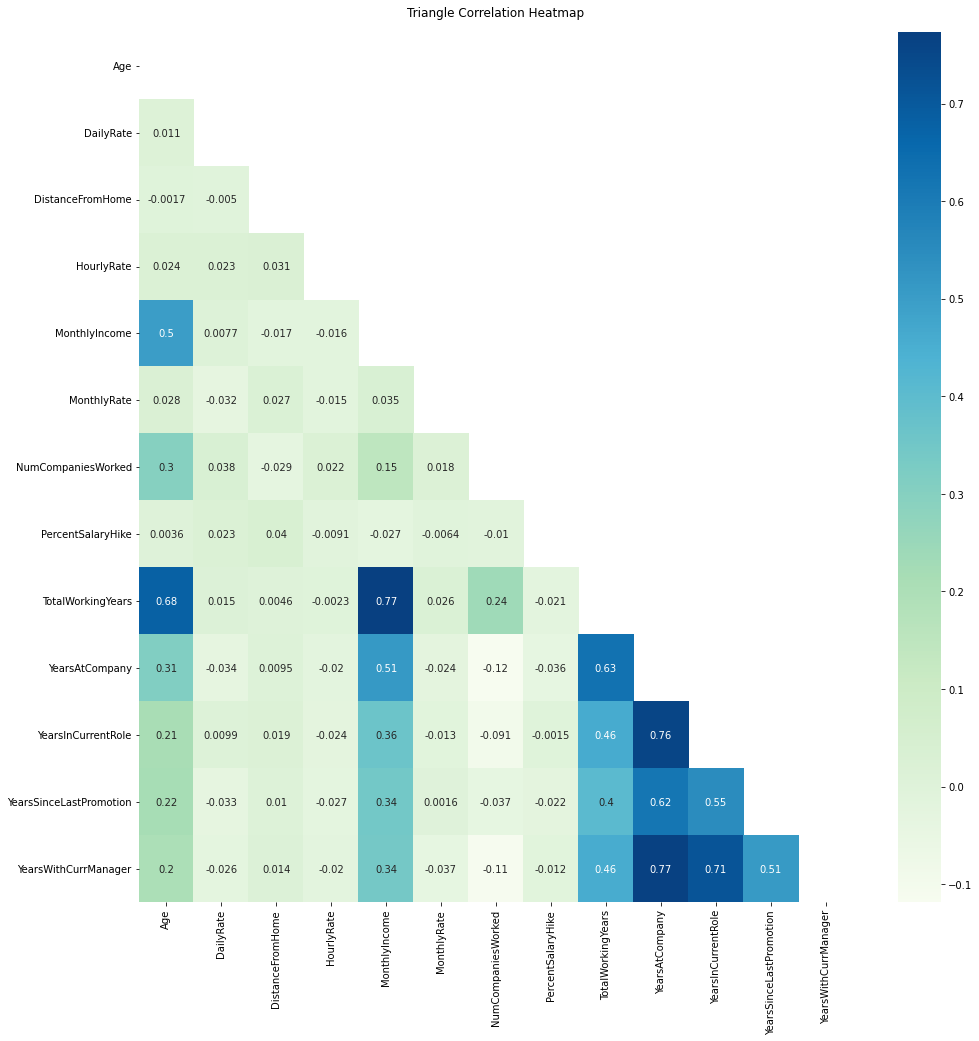

In [ ]:
plt.figure(figsize=(16, 16))
triangle = np.triu(np.ones_like(employee_continuous.corr(),dtype=np.bool))
heatmap = sns.heatmap(employee_continuous.corr(), mask=triangle, annot=True, cmap='GnBu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=16)

# Regression Analysis

## Preliminary to Regression Analysis

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X= employee[['MonthlyIncome','YearsSinceLastPromotion','YearsAtCompany','DistanceFromHome','NumCompaniesWorked']]
calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,variables,VIF
0,MonthlyIncome,3.881511
1,YearsSinceLastPromotion,2.367267
2,YearsAtCompany,4.334148
3,DistanceFromHome,1.728443
4,NumCompaniesWorked,1.875217


In [ ]:
second_set= employee[['DailyRate','YearsWithCurrManager','YearsInCurrentRole','DistanceFromHome','MonthlyIncome']]
calc_vif(second_set)

,variables,VIF
0,DailyRate,2.719916
1,YearsWithCurrManager,4.765305
2,YearsInCurrentRole,4.971583
3,DistanceFromHome,1.947116
4,MonthlyIncome,3.037389


In [ ]:
## The Pearson's chi-squared statistical hypothesis is an example of a test for independence between categorical variables
## Contingency Table
from scipy.stats import chisquare
employee_cate = employee.loc[:, ['Attrition', 'BusinessTravel', 'Department','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','MaritalStatus','OverTime','PerformanceRating','StockOptionLevel','WorkLifeBalance']]
df_employee=employee_cate.apply(lambda x : pd.factorize(x)[0])+1

Contingency = pd.DataFrame([chisquare(df_employee[x].values,f_exp=df_employee.values.T,axis=1)[0] for x in df_employee])
Contingency

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,983.500000,453.500000,1307.816667,857.666667,576.0,957.500000,901.616667,2140.880159,534.000000,344.0,1062.5,721.333333,477.916667
1,629.5,0.000000,726.500000,1627.233333,1286.583333,674.0,943.416667,1205.450000,2744.895238,875.833333,657.5,817.0,973.833333,1019.583333
2,383.5,1008.500000,0.000000,1430.783333,959.750000,609.0,965.166667,822.066667,1776.657143,666.666667,521.0,1056.0,885.916667,659.833333
3,2582.0,4852.000000,3275.166667,0.000000,2406.166667,3454.0,4275.333333,3230.333333,3586.631746,2882.000000,2931.5,5534.0,3521.500000,1782.250000
4,1689.0,3591.166667,2060.333333,2728.800000,0.000000,2467.5,3224.833333,2281.000000,2736.354762,2158.166667,1951.0,4175.0,2660.750000,1140.166667
5,400.5,778.500000,487.500000,1364.816667,1017.416667,0.0,825.250000,907.716667,2386.578968,633.000000,440.0,797.0,789.333333,707.416667
6,922.0,1416.666667,998.666667,1862.233333,1480.750000,1061.0,0.000000,1445.400000,2706.365079,1121.166667,973.0,1516.5,1299.666667,1055.333333
7,1220.0,2856.333333,1522.500000,2326.650000,1515.000000,1949.5,2517.333333,0.000000,1941.473016,1632.166667,1640.0,3103.0,2105.750000,1126.833333
8,7545.0,14000.833333,7451.000000,8430.783333,6631.500000,10522.5,12319.250000,6042.316667,0.000000,8370.333333,8954.5,15774.0,10353.333333,5331.916667
9,538.0,1537.833333,846.666667,1630.933333,1114.833333,980.5,1465.166667,1263.933333,2351.172222,0.000000,865.5,1743.0,396.250000,715.333333


In [ ]:
from scipy.stats import chi2_contingency 

cat_cols=[]
for i in employee.columns:
    if employee[i].nunique() <= 5 or employee[i].dtype == object:
        cat_cols.append(i)
df=employee.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
for i in employee[cat_cols]:
    if i=='Attrition':
        continue
    employee[i] = pd.Categorical(employee[i])
df=employee.copy()
cat_cols=employee.select_dtypes(include="category").columns.tolist() 
chi_statistic=[]
p_val=[]
vars_rm=[]
for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=False)
display(chi_df)

Attrition and Education are independent (p-value = 0.55).

Attrition and EmployeeCount are independent (p-value = 1.00).

Attrition and Gender are independent (p-value = 0.29).

Attrition and Over18 are independent (p-value = 1.00).

Attrition and PerformanceRating are independent (p-value = 0.99).

Attrition and RelationshipSatisfaction are independent (p-value = 0.15).

Attrition and StandardHours are independent (p-value = 1.00).



,Variable,Chi_Statistic,P_value
3,EducationField,16.024674,6.773980e-03
1,Department,10.796007,4.525607e-03
18,WorkLifeBalance,16.325097,9.725699e-04
10,JobSatisfaction,17.505077,5.563005e-04
5,EnvironmentSatisfaction,22.503881,5.123469e-05
0,BusinessTravel,24.182414,5.608614e-06
7,JobInvolvement,28.492021,2.863181e-06
11,MaritalStatus,46.163677,9.455511e-11
17,StockOptionLevel,60.598301,4.379390e-13
8,JobLevel,72.529013,6.634685e-15


## Regression Analysis

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats as stats
from sklearn import linear_model
import statsmodels.api as sm
y=employee['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
X=employee.loc[:, employee.columns != 'Attrition']
num_cat=['BusinessTravel', 'Department','EducationField','StockOptionLevel',  'EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','MaritalStatus','Education','OverTime', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction' , 'WorkLifeBalance']

X=pd.get_dummies(X, columns=num_cat,drop_first = True)

y=y.astype('category')
X


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Education_2,Education_3,Education_4,Education_5,OverTime_Yes,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,1,94,5993,19479,8,Y,11,80,8,0,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,49,279,8,1,2,61,5130,24907,1,Y,23,80,10,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2,37,1373,2,1,4,92,2090,2396,6,Y,15,80,7,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,33,1392,3,1,5,56,2909,23159,1,Y,11,80,8,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,7,40,3468,16632,9,Y,12,80,6,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2061,41,2571,12290,4,Y,17,80,17,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1466,39,613,6,1,2062,42,9991,21457,4,Y,15,80,9,5,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,1,2064,87,6142,5174,1,Y,20,80,6,0,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0
1468,49,1023,2,1,2065,63,5390,13243,2,Y,14,80,17,3,9,6,0,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0


In [ ]:
import statsmodels.api as sm

X_var = X[['Age','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','MonthlyIncome','DistanceFromHome','NumCompaniesWorked','YearsWithCurrManager','JobInvolvement_2','JobInvolvement_3','JobInvolvement_4','OverTime_Yes']]
print(X_var)
logit_model=sm.Logit(y,X_var)
result=logit_model.fit()
print(result.summary2())

      Age  BusinessTravel_Travel_Frequently  ...  JobInvolvement_4  OverTime_Yes
0      41                                 0  ...                 0             1
1      49                                 1  ...                 0             0
2      37                                 0  ...                 0             1
3      33                                 1  ...                 0             1
4      27                                 0  ...                 0             0
...   ...                               ...  ...               ...           ...
1465   36                                 1  ...                 1             0
1466   39                                 0  ...                 0             0
1467   27                                 0  ...                 1             1
1468   49                                 1  ...                 0             0
1469   34                                 0  ...                 1             0

[1470 rows x 11 columns]
Op

In [ ]:
 
X_1 = X.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'], axis=1)
logit_model_1=sm.Logit(y, X_1)
result_1=logit_model_1.fit()
print(result_1.summary2())

Optimization terminated successfully.
         Current function value: 0.263733
         Iterations 9
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.403     
Dependent Variable:       Attrition             AIC:                   899.3749  
Date:                     2021-12-14 09:39      BIC:                   1227.5420 
No. Observations:         1470                  Log-Likelihood:        -387.69   
Df Model:                 61                    LL-Null:               -649.29   
Df Residuals:             1408                  LLR p-value:           1.1907e-74
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           9.0000                                                 
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------

# Machine Learning _ RandomForest & Logistic Regression



In [ ]:
## Random forests is a supervised learning algorithm. It can be used both for classification and regression.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X_1,y,test_size=0.30,random_state=0)
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_predicted = randomforest.predict(X_test)
acc_rf = round(accuracy_score(y_predicted, y_test)*100,2)
print(acc_rf)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

## an accuracy score. This score measures how many labels the model gets right out of the total number of predictions.
## Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class.

86.17
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       371
           1       0.91      0.14      0.25        70

    accuracy                           0.86       441
   macro avg       0.88      0.57      0.59       441
weighted avg       0.87      0.86      0.82       441



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



85.26
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       1.00      0.07      0.13        70

    accuracy                           0.85       441
   macro avg       0.93      0.54      0.53       441
weighted avg       0.87      0.85      0.79       441



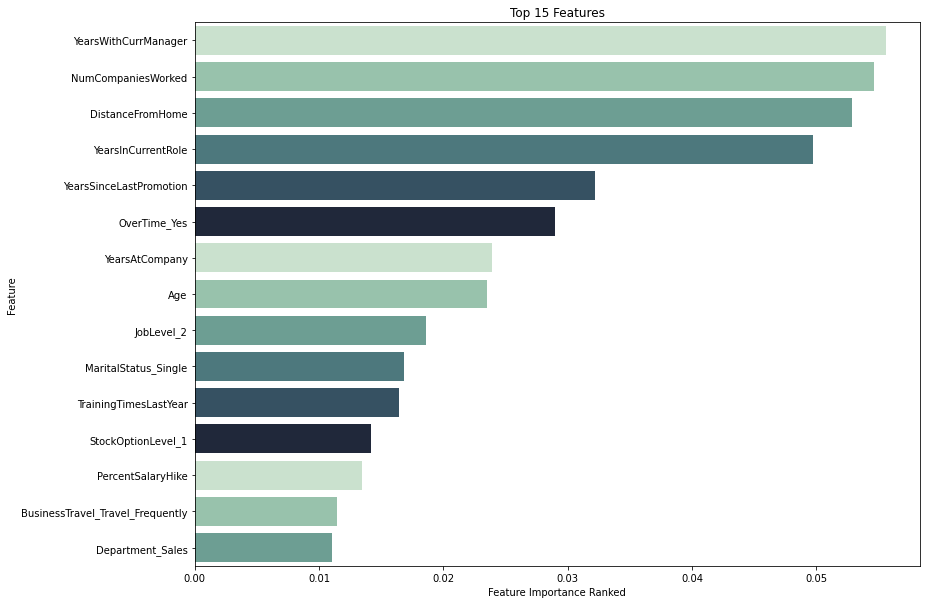

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predicted_1 = logreg.predict(X_test)
acc_logistic = round(accuracy_score(y_predicted_1, y_test) * 100, 2)
print(acc_logistic)
print(classification_report(y_test,y_predicted_1))
coef = np.squeeze(abs(logreg.coef_)).tolist()
Featurehost = pd.DataFrame({'Feature': list(X_train), 'Feature Importance Ranked': coef})
Featurehost = Featurehost.sort_values(by='Feature Importance Ranked',ascending=False).head(15)
plt.figure(figsize = (13,10))
plt.title('Top 15 Features',fontsize=12)
s = sns.barplot(y='Feature',x='Feature Importance Ranked',data=Featurehost,palette=sns.cubehelix_palette(rot=-.4))